# Escalamiento de datos

## Librerias

**Starter Pack**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Utils**

In [2]:
import timeit

**Modelos/Datos**

In [3]:
from sklearn import datasets, linear_model

### 1. Datos Númericos

In [4]:
data = datasets.load_diabetes()

In [31]:
data['data'].shape

(442, 10)

In [5]:
X, y = datasets.load_diabetes(return_X_y=True) 

In [35]:
X.shape

(442, 10)

In [6]:
names = data.feature_names

In [7]:
df_X = pd.DataFrame(X)
df_X.columns=names

In [8]:
df_X.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204


In [9]:
raw = X[:, None, 2]

#### **1.1 Transformaciones Lineales**

**Escalamiento Linear**: 
<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Algunos modelos de Machine Learning son más eficientes en el rango [-1, 1]</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>max-min, Z-Score, Clipping, Winsorizing, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Cuando la data es simétrica o esta uniformemente distribuida</p>        
    </li>
</ul>

**A) Máximo-Minimo**

In [37]:
max_raw = raw.max()
min_raw = raw.min()

In [38]:
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

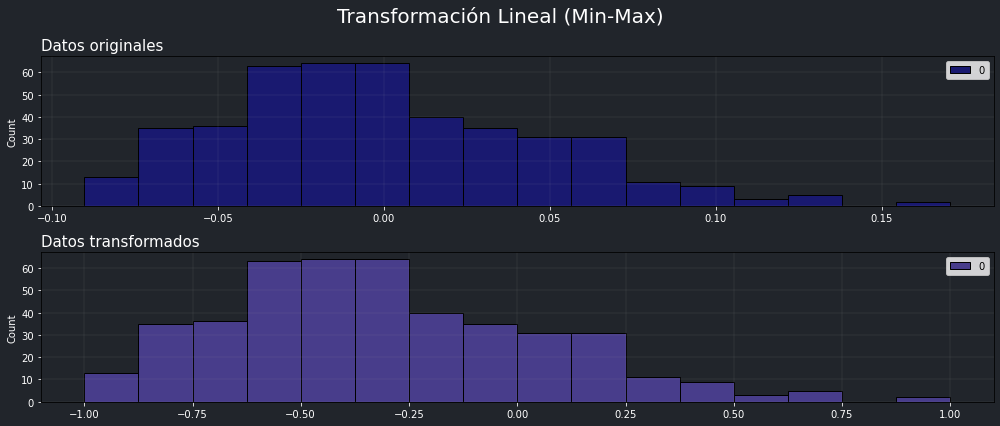

In [152]:
fig, ax = plt.subplots(2,1, figsize=(14, 6))

fig.suptitle('Transformación Lineal (Min-Max)', color='white', fontsize=20)

fig.patch.set_facecolor('#21252b') 

# Primer gráfico
sns.histplot(raw, ax=ax[0], facecolor='MidnightBlue')
ax[0].set_title('Datos originales', color='white', fontsize=15, loc='left')

ax[0].set_facecolor('#21252b') 
ax[0].grid(linewidth=0.1)

ax[0].yaxis.label.set_color('white')
ax[0].tick_params(axis='x', labelcolor='white', color='white')
ax[0].tick_params(axis='y', labelcolor='white', color='white')

# Segundo gráfico
sns.histplot(scaled, ax=ax[1], facecolor='DarkSlateBlue')
ax[1].set_title('Datos transformados', color='white', fontsize=15, loc='left')

ax[1].set_facecolor('#21252b') 
ax[1].grid(linewidth=0.1)

ax[1].yaxis.label.set_color('white')
ax[1].tick_params(axis='x', labelcolor='white', color='white')
ax[1].tick_params(axis='y', labelcolor='white', color='white')

fig.tight_layout()
plt.show()

**Modelo**

In [153]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

In [154]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100000)
scaled_time = timeit.timeit(train_scaled, number=100000)

**Comparamos los tiempos de cada modelo**

In [ ]:
round(raw_time, 2), round(scaled_time, 2)

#### **1.2 Transformaciones no lineales**

<ul>
    <li>
        <strong>¿Por qué usarlos?</strong> 
        <p>Lo usamos cuando nuestros datos estan fuertemente sesgados, no son simetricos.</p>
    </li>
    <li>
        <strong>Hay diferentes tipos</strong> 
        <p>Logaritmos, sigmoides, polinomiales, etc.</p>
    </li>
    <li>
        <strong>¿Cuándo usarlos?</strong> 
        <p>Antes de hacer escalamientos lineales</p>        
    </li>
</ul>

In [33]:
df = pd.read_csv('Data/cars.csv')

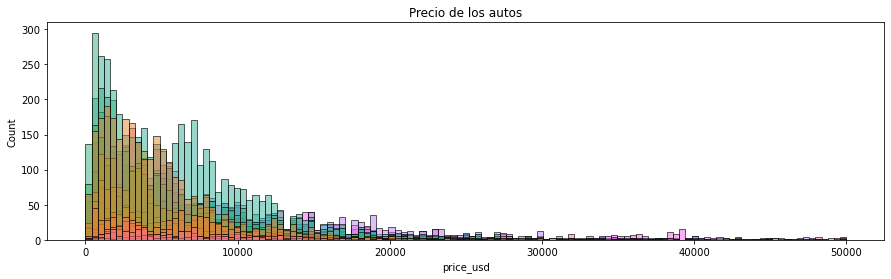

In [43]:
plt.figure(figsize=(15,4))
plt.title('Precio de los autos')
sns.histplot(data = df, x = df['price_usd'], hue=df['manufacturer_name'], legend=False)
plt.show()

**Tangente hiperbolica**

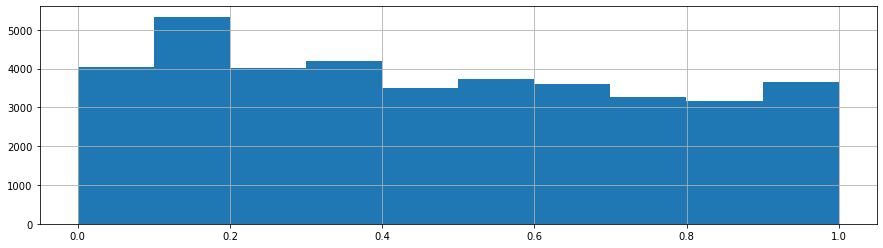

In [35]:
p = 10000

plt.figure(figsize=(15,4))
df['price_usd'].apply(lambda x: np.tanh(x/p)).hist()
plt.show()

### Datos Categóricos